In [3]:
import glob, pathlib
from bddl.activity import Conditions

In [4]:
# Get the activity filename map
act_to_fn = {}

from_b1k = glob.glob(r"D:\ObjectPropertyAnnotation\init_goal_cond_annotations\problem_files_verified_b1k\*")
from_b100 = glob.glob(r"D:\bddl-dev\bddl\activity_definitions\*")
for x in from_b1k + from_b100:
    p = pathlib.Path(x)
    if not p.is_dir():
        continue
    act_name = p.name.replace(" ", "_").replace("-", "_").replace("'", "_")
    if act_name in act_to_fn:
        print(f"Found duplicate for {act_name}")
    act_to_fn[act_name] = p

In [15]:
len(act_to_fn)

1063

In [13]:
def evaluate_task(task_name):
    task_file = act_to_fn[task_name] / "problem0.bddl"
    assert task_file.exists(), f"{task_name} file missing"
    with open(task_file, "r") as f:
        predefined_problem = "".join(f.readlines())
    dom = "omnigibson" if "ObjectPropertyAnnotation" in str(task_file) else "igibson"
    conds = Conditions(task_name, "potato", dom, predefined_problem=predefined_problem)
    return list(conds.parsed_goal_conditions)

In [20]:
pred_counts = sorted([(x, len(evaluate_task(x))) for x in act_to_fn], key=lambda x: -x[1])

f is not recognized in problem


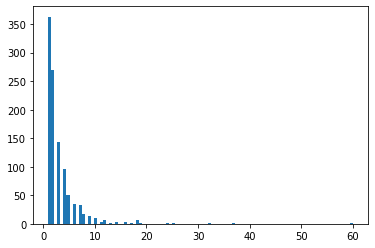

In [21]:
import matplotlib.pyplot as plt
plt.hist([x[1] for x in pred_counts], bins="auto")
plt.show()

In [24]:
import collections
collections.Counter([x[1] for x in pred_counts]).most_common()

[(1, 363),
 (2, 270),
 (3, 143),
 (4, 96),
 (5, 51),
 (6, 34),
 (7, 33),
 (8, 18),
 (9, 14),
 (10, 10),
 (18, 6),
 (12, 6),
 (14, 4),
 (16, 3),
 (11, 3),
 (13, 2),
 (60, 1),
 (37, 1),
 (32, 1),
 (25, 1),
 (24, 1),
 (19, 1),
 (17, 1)]

In [31]:
import random, csv
sample_tasks = random.sample(list(act_to_fn.keys()), k=50)
entries = [{"name": x, "goals": "\n".join([str(y) for y in evaluate_task(x)])} for x in sample_tasks]
with open(r"C:\Users\Cem\Downloads\task_sample.csv", "w") as f:
    writer = csv.DictWriter(f, ["name", "goals"])
    writer.writeheader()
    for row in entries:
        writer.writerow(row)

In [32]:
b20 = [
    "attach a camera to a tripod",
    "boil water",
    "chop an onion",
    "clean up broken glass",
    "cleaning bathtub",
    "fill a bucket in a small sink",
    "folding piece of cloth",
    "freeze pies",
    "hanging up bedsheets",
    "make a steak",
    "make a strawberry slushie",
    "melt white chocolate",
    "mixing drinks",
    "mowing the lawn",
    "putting away Halloween decorations",
    "putting away toys",
    "putting up shelves",
    "setting the fire",
    "spraying for bugs",
    "thawing frozen food",
]

In [41]:
def evaluate_task2(task_name):
    task_name = task_name.replace(" ", "_")
    task_file = act_to_fn[task_name] / "problem0.bddl"
    assert task_file.exists(), f"{task_name} file missing"
    with open(task_file, "r") as f:
        predefined_problem = "".join(f.readlines())
    dom = "omnigibson" if "ObjectPropertyAnnotation" in str(task_file) else "igibson"
    conds = Conditions(task_name, "potato", dom, predefined_problem=predefined_problem)
    return {
        "name": task_name,
        "init": "\n".join([str(y) for y in conds.parsed_initial_conditions]),
        "goal": "\n".join([str(y) for y in conds.parsed_goal_conditions])
    }

In [42]:
entries = [evaluate_task2(x) for x in b20]
with open(r"C:\Users\Cem\Downloads\task_b20.csv", "w") as f:
    writer = csv.DictWriter(f, ["name", "init", "goal"])
    writer.writeheader()
    for row in entries:
        writer.writerow(row)

In [43]:
[x for x in act_to_fn if "attach" in x]

['attach_a_camera_to_a_tripod']